In [1]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import nltk
import string
import warnings
from scipy.stats import pearsonr
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

nltk.download('stopwords')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/content/tedx_dataset.csv', engine='python')
df.head().T

,0,1,2,3,4
idx,8d2005ec35280deb6a438dc87b225f89,b3072cd11f40eb57fd259555264476c6,4adc9fee977fa04c357ed4c9b52aa3cc,59c641a72b495d522a7932145d6c02b3,d227f2faf6ec185e54436d86463f499b
main_speaker,Alexandra Auer,Elizabeth Gilbert,Butterscotch,Ethan Lisi,Daniel Finkel
title,The intangible effects of walls,It's OK to feel overwhelmed. Here's what to do...,"""Accept Who I Am""",What it's really like to have autism,Can you solve the sea monster riddle?
details,More barriers exist now than at the end of Wor...,If you're feeling anxious or fearful during th...,"Firing off her formidable beatboxing skills, m...","""Autism is not a disease; it's just another wa...","According to legend, once every thousand years..."
posted,Posted Apr 2020,Posted Apr 2020,Posted Apr 2020,Posted Apr 2020,Posted Apr 2020
url,https://www.ted.com/talks/alexandra_auer_the_i...,https://www.ted.com/talks/elizabeth_gilbert_it...,https://www.ted.com/talks/butterscotch_accept_...,https://www.ted.com/talks/ethan_lisi_what_it_s...,https://www.ted.com/talks/daniel_finkel_can_yo...
num_views,NaN,NaN,0.0,NaN,0.0


In [3]:
df['details'][0]

'More barriers exist now than at the end of World War II, says designer Alexandra Auer. And when you erect one wall, you unwittingly create a second -- an "us" versus "them" partition in the mind that compromises our collective safety. With intriguing results from her social design project focused on two elementary schools separated by a fence, Auer encourages us to dismantle our biases and regain perspective on all the things we have in common.'

In [4]:
df['posted'][0]

'Posted Apr 2020'

In [5]:
df.shape

(4467, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4467 entries, 0 to 4466
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   idx           4467 non-null   object 
 1   main_speaker  4466 non-null   object 
 2   title         4467 non-null   object 
 3   details       4467 non-null   object 
 4   posted        4467 non-null   object 
 5   url           4467 non-null   object 
 6   num_views     209 non-null    float64
dtypes: float64(1), object(6)
memory usage: 244.4+ KB


In [7]:
df.isnull().sum()

,0
idx,0
main_speaker,1
title,0
details,0
posted,0
url,0
num_views,4258


In [8]:
splitted = df['posted'].str.split(' ', expand=True)
splitted.head()

,0,1,2
0,Posted,Apr,2020
1,Posted,Apr,2020
2,Posted,Apr,2020
3,Posted,Apr,2020
4,Posted,Apr,2020


In [9]:
df['year'] = splitted[2].astype('int')
df['month'] = splitted[1]

In [10]:
df.describe()

,num_views,year
count,209.0,4467.000000
mean,0.0,2014.499888
std,0.0,3.800345
min,0.0,2006.000000
25%,0.0,2012.000000
50%,0.0,2015.000000
75%,0.0,2018.000000
max,0.0,2020.000000


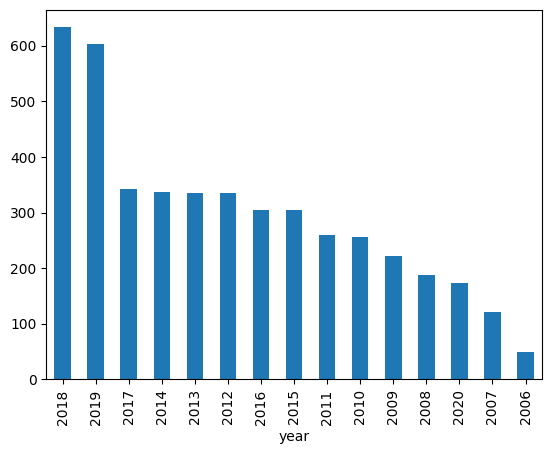

In [11]:
df['year'].value_counts().plot.bar()
plt.show()

In [12]:
df.head(1)

,idx,main_speaker,title,details,posted,url,num_views,year,month
0,8d2005ec35280deb6a438dc87b225f89,Alexandra Auer,The intangible effects of walls,More barriers exist now than at the end of Wor...,Posted Apr 2020,https://www.ted.com/talks/alexandra_auer_the_i...,NaN,2020,Apr


In [13]:
df['details'] = df['title'] + ' ' + df['details']
df.head(1).T

,0
idx,8d2005ec35280deb6a438dc87b225f89
main_speaker,Alexandra Auer
title,The intangible effects of walls
details,The intangible effects of walls More barriers ...
posted,Posted Apr 2020
url,https://www.ted.com/talks/alexandra_auer_the_i...
num_views,NaN
year,2020
month,Apr


In [14]:
df['details'] = df['title'] + ' ' + df['details']

df = df[['main_speaker', 'details']]
df.dropna(inplace = True)
df.head()

,main_speaker,details
0,Alexandra Auer,The intangible effects of walls The intangible...
1,Elizabeth Gilbert,It's OK to feel overwhelmed. Here's what to do...
2,Butterscotch,"""Accept Who I Am"" ""Accept Who I Am"" Firing off..."
3,Ethan Lisi,What it's really like to have autism What it's...
4,Daniel Finkel,Can you solve the sea monster riddle? Can you ...


In [15]:
data = df.copy()

In [16]:
def remove_stopwords(text):
  stop_words = stopwords.words('english')

  imp_words = []
  for word in str(text).split():
    word = word.lower()

    if word not in stop_words:
      imp_words.append(word)

  output = " ".join(imp_words)

  return output

In [17]:
df['details'] = df['details'].apply(lambda text: remove_stopwords(text))
df.head()

,main_speaker,details
0,Alexandra Auer,intangible effects walls intangible effects wa...
1,Elizabeth Gilbert,ok feel overwhelmed. here's next ok feel overw...
2,Butterscotch,"""accept am"" ""accept am"" firing formidable beat..."
3,Ethan Lisi,"really like autism really like autism ""autism ..."
4,Daniel Finkel,solve sea monster riddle? solve sea monster ri...


In [18]:
punctuations_list = string.punctuation
punctuations_list

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [19]:
signal = str.maketrans('', '', punctuations_list)
signal

{33: None,
 34: None,
 35: None,
 36: None,
 37: None,
 38: None,
 39: None,
 40: None,
 41: None,
 42: None,
 43: None,
 44: None,
 45: None,
 46: None,
 47: None,
 58: None,
 59: None,
 60: None,
 61: None,
 62: None,
 63: None,
 64: None,
 91: None,
 92: None,
 93: None,
 94: None,
 95: None,
 96: None,
 123: None,
 124: None,
 125: None,
 126: None}

In [20]:
def cleaning_punctuations(text):
    signal = str.maketrans('', '', punctuations_list)
    return text.translate(signal)


df['details'] = df['details'].apply(lambda x: cleaning_punctuations(x))
df.head()

,main_speaker,details
0,Alexandra Auer,intangible effects walls intangible effects wa...
1,Elizabeth Gilbert,ok feel overwhelmed heres next ok feel overwhe...
2,Butterscotch,accept am accept am firing formidable beatboxi...
3,Ethan Lisi,really like autism really like autism autism d...
4,Daniel Finkel,solve sea monster riddle solve sea monster rid...


In [21]:
details_corpus = " ".join(df['details'])
details_corpus

'intangible effects walls intangible effects walls barriers exist end world war ii says designer alexandra auer erect one wall unwittingly create second  us versus them partition mind compromises collective safety intriguing results social design project focused two elementary schools separated fence auer encourages us dismantle biases regain perspective things common ok feel overwhelmed heres next ok feel overwhelmed heres next feeling anxious fearful coronavirus pandemic alone offering hope understanding author elizabeth gilbert reflects stay present accept grief comes trust strength human spirit resilience shared genetic inheritance says this virtual conversation part ted connects series hosted head ted chris anderson head curation helen walters recorded april 2 2020 accept am accept am firing formidable beatboxing skills musician butterscotch serenades  hauntingly beautiful backtrack made live stage  shares pieces story shoutout struggling dark times we compassionate ourselves allo

In [22]:
len(details_corpus)

1394352

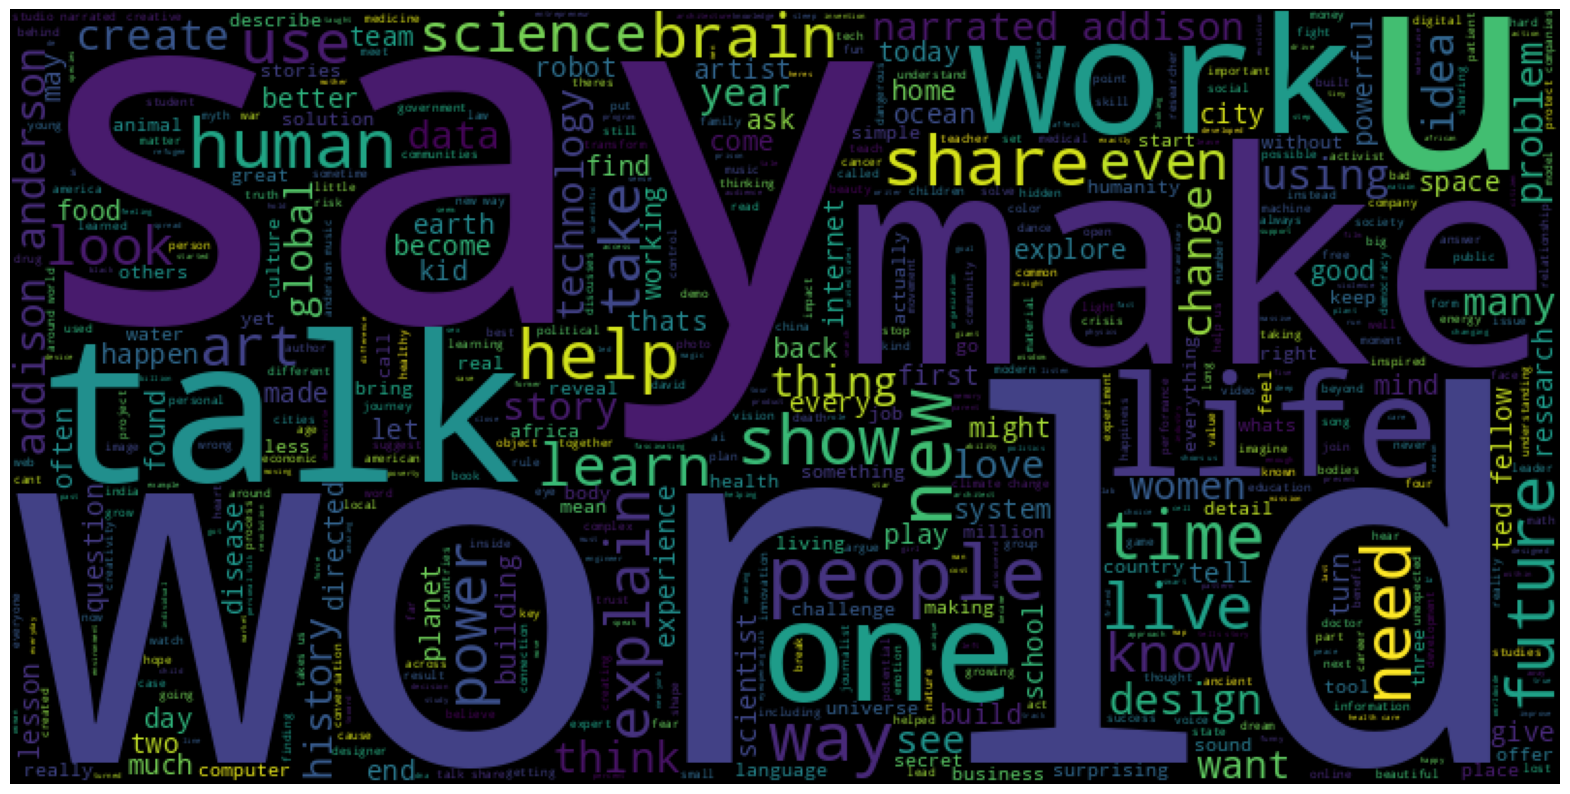

In [23]:
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=800, height=400).generate(details_corpus)
plt.axis('off')
plt.imshow(wc)
plt.show()

In [24]:
%%capture
vectorizer = TfidfVectorizer(analyzer = 'word')
vectorizer.fit(df['details'])

In [25]:
def get_similarities(talk_content, data=df):

    # Getting vector for the input talk_content.
    talk_array1 = vectorizer.transform(talk_content).toarray()

    # We will store similarity for each row of the dataset.
    sim = []
    pea = []
    for idx, row in data.iterrows():
        details = row['details']

        # Getting vector for current talk.
        talk_array2 = vectorizer.transform(data[data['details'] == details]['details']).toarray()

        # Calculating cosine similarities
        cos_sim = cosine_similarity(talk_array1, talk_array2)[0][0]

        # Calculating pearson correlation
        pea_sim = pearsonr(talk_array1.squeeze(), talk_array2.squeeze())[0]

        sim.append(cos_sim)
        pea.append(pea_sim)

    return sim, pea

In [26]:
def recommend_talks(talk_content, data=data):
    data['cos_sim'], data['pea_sim'] = get_similarities(talk_content)

    data.sort_values(by=['cos_sim', 'pea_sim'], ascending=[False, False], inplace=True)

    display(data[['main_speaker', 'details']].head())

In [27]:
talk_content = ['Time Management and working hard to become successful in life']
recommend_talks(talk_content)

,main_speaker,details
1758,Laura Vanderkam,How to gain control of your free time How to g...
66,Fang Ruan,Management lessons from Chinese business and p...
2173,Philip Krinks,Finding your personal mission in life Finding ...
2124,Kanawat Senanan,How do hard drives work? How do hard drives wo...
2547,Ruth Chang,How to make hard choices How to make hard choi...


In [28]:
talk_content = ['Climate change and impact on the health. How can we change this world by reducing carbon footprints?']
recommend_talks(talk_content)

,main_speaker,details
2086,Nonny de la Peña,The future of news? Virtual reality The future...
2626,Chris Hadfield,What I learned from going blind in space What ...
1910,Mia Nacamulli,How the food you eat affects your brain How th...
2832,Kelli Sandman-Hurley,What is dyslexia? What is dyslexia? Dyslexia a...
679,Graham Worthy,The future of our coastal systems The future o...
